# Building an Energy Model

In this notebook, we will build a model of the Austrian energy system from scratch. The process will involve defining our model's time horizon and spatial extent, and then populating the model with data associated with model parameters. Once we have a basline model, we will then move on to investigating policy scenarios.

We will be populating different kinds of parameters including

### Economic Parameters

- `interestrate`
- `demand`

### Technology Parameters

#### Engineering Parameters

- `input`
- `output`
- `technical_lifetime`
- `capacity_factor`


#### Technoeconomic Parameters

- `inv_cost`
- `fix_cost`
- `var_cost`

### Dynamic Behavior Parameters

- `bound_activity_up`
- `bound_activity_lo`
- `bound_new_capacity_up`
- `initial_activity_up`
- `growth_activity_up`

### Emissions

- `emission_factor`

A full list of parameters can be found on the (internal) [MESSAGEix documentation website](http://ienecat.iiasa.ac.at:8787/message_ix_doc). This website can be built in the future from the repository that you are using. 

## The Final Product

At the completion of this exercise, we will have developed an energy model is comprised of the below Reference Energy System (RES):

![title](austria.png)



## Setup

In [1]:
# load required packages 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from ixmp import ixPlatform

import tools

In [2]:
model = "Austrian energy model"
scen = "baseline"

In [3]:
tools.check_local_model(model, 'austria.ipynb')

In [4]:
# launch the IX modeling platform using the local default database                                                                                                                       
mp = ixPlatform(dbtype='HSQLDB')

In [5]:
ds = mp.datastructure(model, scen)

In [6]:
ds.solve()

# Plotting Results

In [7]:
from tools import Plots
countries = ds.set("node")
print countries
country = 'Austria'
p = Plots(ds, country)

0      World
1    Austria
dtype: object


0             coal_ppl
1              gas_ppl
2              oil_ppl
3              bio_ppl
4            hydro_ppl
5             wind_ppl
6         solar_pv_ppl
7               import
8     electricity_grid
9                 bulb
10                 cfl
11          appliances
dtype: object


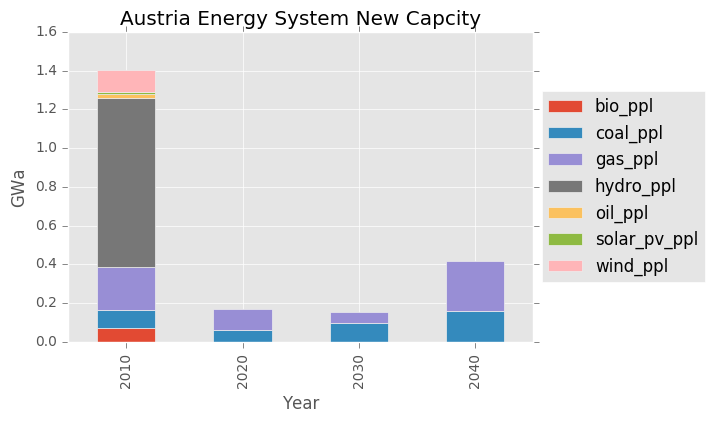

In [8]:
technologies = ds.set("technology")
print technologies
plants = [
    "coal_ppl", 
    "gas_ppl", 
    "oil_ppl", 
    "bio_ppl", 
    "hydro_ppl",
    "wind_ppl", 
    "solar_pv_ppl",]
p.plot_new_capacity(baseyear=True, subset=plants)

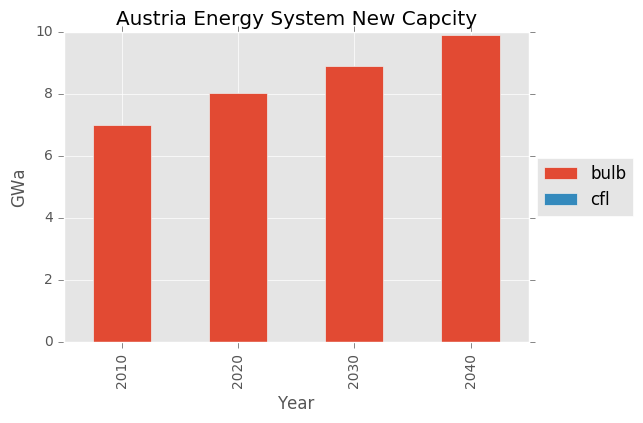

In [9]:
lights = [
    "bulb", 
    "cfl", 
]
p.plot_new_capacity(baseyear=True, subset=lights)

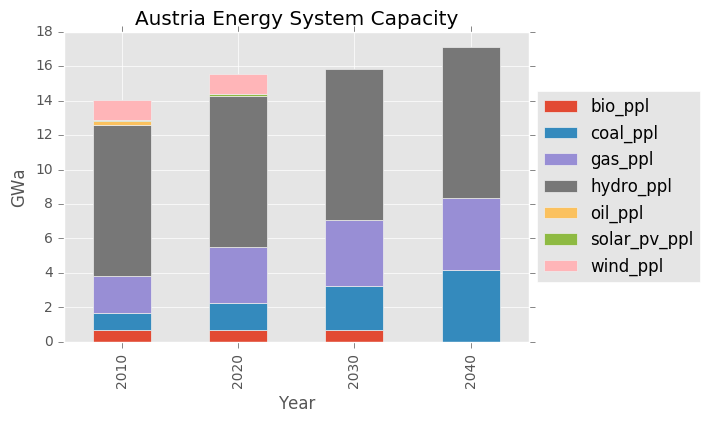

In [10]:
p.plot_capacity(baseyear=True, subset=plants)

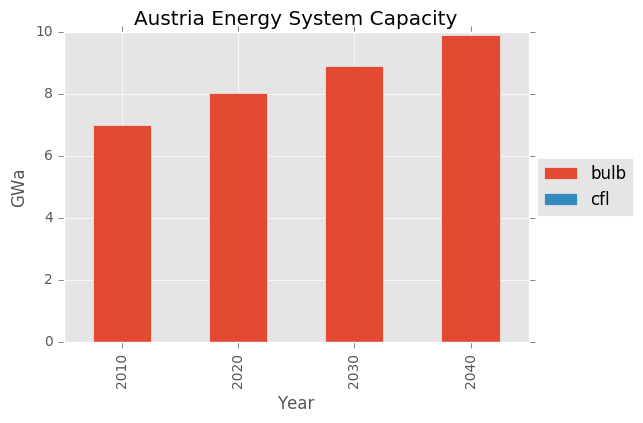

In [11]:
p.plot_capacity(baseyear=True, subset=lights)

           commodity   level     node  time unit     value  year
0  other_electricity  useful  Austria  year  GWa  6.302397  2010
1  other_electricity  useful  Austria  year  GWa  7.228310  2020
2  other_electricity  useful  Austria  year  GWa  8.019210  2030
3  other_electricity  useful  Austria  year  GWa  8.900723  2040
  commodity   level     node  time unit     value  year
0     light  useful  Austria  year  GWa  0.700228  2010
1     light  useful  Austria  year  GWa  0.803102  2020
2     light  useful  Austria  year  GWa  0.890975  2030
3     light  useful  Austria  year  GWa  0.988915  2040


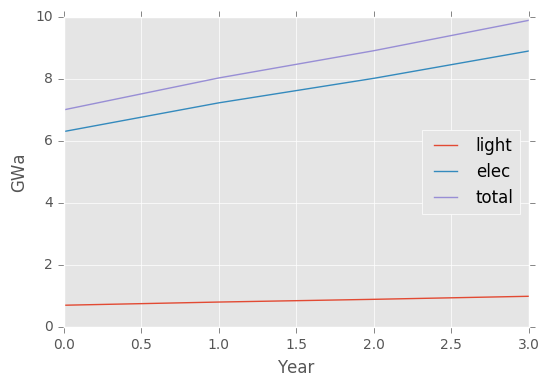

In [12]:
demands = ds.par("demand") 
elec_demand = ds.par("demand", {'commodity': ['other_electricity']})
print elec_demand
light_demand = ds.par("demand", {'commodity': ['light']})
print light_demand
p.plot_demand(light_demand, elec_demand)

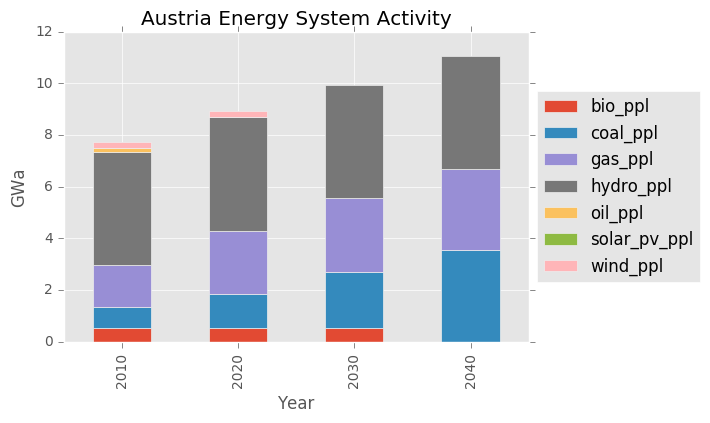

In [13]:
p.plot_activity(baseyear=True, subset=plants)

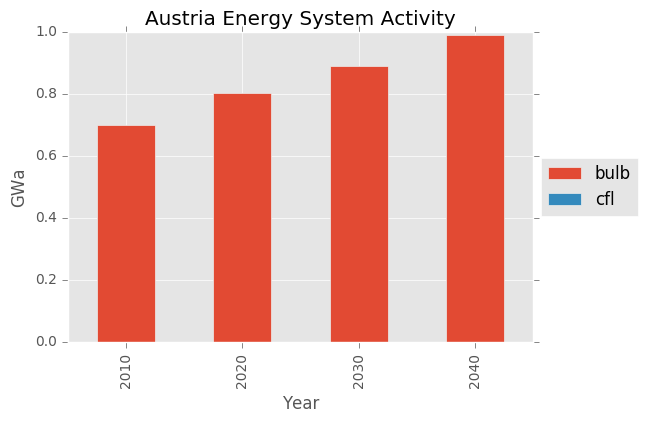

In [14]:
p.plot_activity(baseyear=True, subset=lights)

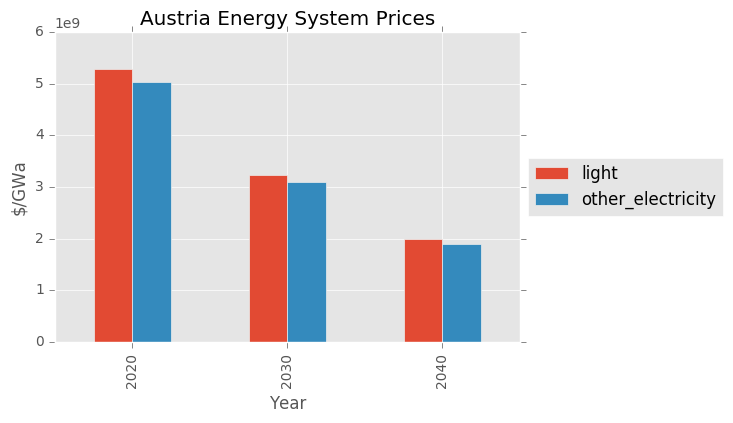

In [15]:
p.plot_prices(baseyear=False, subset=['light', 'other_electricity'])

In [16]:
mp.close_db()